## E02 : Adversarial Search (Minimax)

In [1]:
from matplotlib.colors import ListedColormap
from matplotlib.figure import Figure
from IPython.display import display
from classes.TicTacToe import Board
from classes.Color import Color
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

GAME_DIMS = (3,3)

#### **2.01:** Apply Backtracking to Binary Tree

Para el siguiente grafo, utilizando backtracking determine la ruta  
con la cual se alcanza el estado meta representado por el nodo  
$X_{G} = M$, considere que el estado de inicio es $X_{I} = A$  

#### **2.02:** Minimax Tree

Considere un juego que tiene cuatro estados finales y los caminos para alcanzar el estado final van desde la raíz hasta las cuatro hojas de un árbol binario perfecto, como se muestra en la figura.

<img src="imgs/e2.02_tree.jpeg" alt="Árbol de Juego" width=200 height=200>
  
Supongamos que usted es el jugador que maximiza y tiene la primera oportunidad de mover, es decir, esta en la raíz y su oponente en el siguiente nivel.  
  
- ¿Qué movimiento haría como jugador maximizador considerando que su oponente también juega de manera óptima?

**Solution:**  

$max\;(min (3,5),\;min(2,9))$ 

#### **2.03:** Implement Minimax Algorithm

In [ ]:
inputs = [[3,5,2,9],
        [3,5,2,9,12,5,23,23],
        [-1,4,2,6,-3,-5,0,7]]

def pairwise(iterable):
    a = iter(iterable)
    return zip(a, a)

def minimax(terminals:np.ndarray) -> np.int32:
    levels = int(np.log2(len(terminals)))
    if levels == 1: return np.max(terminals)
    elif levels % 2 == 0:
        return minimax(np.array([np.minimum(a,b) for a,b in pairwise(terminals)]))
    else:
        return minimax(np.array([np.maximum(a,b) for a,b in pairwise(terminals)]))

if __name__ == "__main__":
    for i in range(len(inputs)):
        print(f"Test Input #{i}")
        print(f"{minimax(inputs[i])}\n")

#### **2.04:** Implement `initial_state()` functions for Tic-Tac-Toe Board

1) Implementar en Google Colab la función `initial_state()`. La cual  
establece $S_{0}$, el **estado inicial**, que especifica la configuración inicial del  
juego (en nuestro caso, un tablero vacío de ($3 \times 3$). La función debe  
regresar una lista $3 \times 3$ con contenido `'None'` en cada elemento.
  
2) Implementar en Google Colab una función para desplegar la información  
del tablero (estado actual) en forma gráfica utilizando: Matplotlib,  
Pygame, Tkinter, OpenCV, etc.

In [ ]:
board = Board((3,3))

In [ ]:
print(f"{Color.BOLD}Board State (Array){Color.END}: \n{board.state}")
board.board

#### **E2.05**: Implement `Player(s)` and `Actions(s)` methods.

1) Implementar en Google Colab la función `Player(s)`.  
La cual regresa a que jugador `(X o O)` le toca mover  
dado el estado $s$.
  
2) Implementar en Google Colab la función `Actions(s)`.  
La cual regresa un conjunto de acciones legales (qué  
lugares están libres) dado un estado $s$.

In [ ]:
b = Board(GAME_DIMS)
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f'GAME STATE:\n{b.state}\n')
display(b.board)

In [ ]:
# X's Move 1
b.make_move(np.array([2,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f'GAME STATE:\n{b.state}\n')
display(b.board) 

In [ ]:
# O's Move 1
b.make_move(np.array([1,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f'GAME STATE:\n{b.state}\n')
display(b.board) 

##### Reproduce Game with Random Moves

In [4]:
def random_game():
    # Create TicTacToe Board
    b = Board(GAME_DIMS)
    # Game continues while there are None values on the board
    while (np.any(b.state == None)):
        # Get available actions for player in turn
        U = b.actions()
        player = b.player()
        print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if player == "X" else Color.RED} {player}{Color.END}')
        print(f'ACTIONS FROM TURN {b.ply}:\n{U}')
        
        # Randomly selects one action from action space
        z = U[np.random.choice(U.shape[0], size=1, replace=False), :] 

        # Execute selected move
        b.make_move(z)
        winner = b.winner()
        print(f"MOVE PLAYED: {z.flatten()}")
        print(f"WINNER: {winner} ")
        print(f'IS TERMINAL: {b.is_terminal()}')
        display(b.board)
        if winner: return

In [ ]:
b.init_state()

#### **E2.06:** Implementar `Terminal(s)` y `Winner(s)`

1) Implementar en Google Colab la función `Terminal(s)`.  
La cual regresa verdadero (True) cuando el juego  
termina (es decir, verificar si alguien ganó o hay empate)

2) Implementar en Google Colab la función `Winner(s)`.  
La cual regresa el ganado del juego (X o O) o `None` 
en caso de empate.

PLAYER IN TURN:  X
ACTIONS FROM TURN 0:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
MOVE PLAYED: [2 0]
WINNER: False 
IS TERMINAL: False


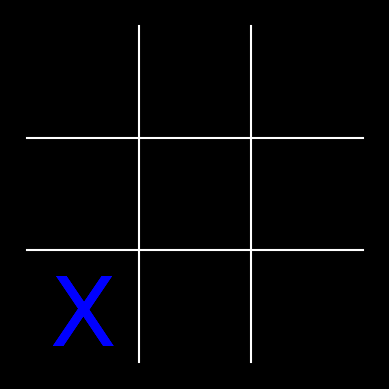

PLAYER IN TURN:  O
ACTIONS FROM TURN 1:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 1]
 [2 2]]
MOVE PLAYED: [1 2]
WINNER: False 
IS TERMINAL: False


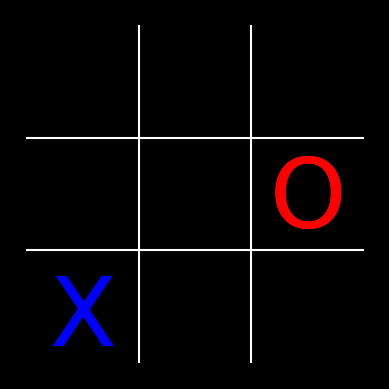

PLAYER IN TURN:  X
ACTIONS FROM TURN 2:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [2 1]
 [2 2]]
MOVE PLAYED: [1 0]
WINNER: False 
IS TERMINAL: False


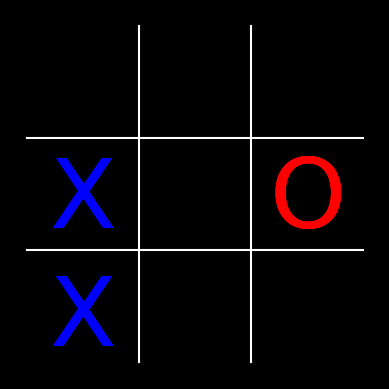

PLAYER IN TURN:  O
ACTIONS FROM TURN 3:
[[0 0]
 [0 1]
 [0 2]
 [1 1]
 [2 1]
 [2 2]]
MOVE PLAYED: [0 2]
WINNER: False 
IS TERMINAL: False


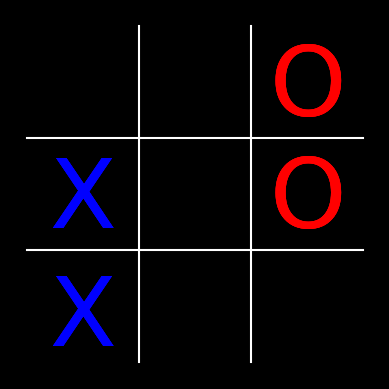

PLAYER IN TURN:  X
ACTIONS FROM TURN 4:
[[0 0]
 [0 1]
 [1 1]
 [2 1]
 [2 2]]
MOVE PLAYED: [2 1]
WINNER: False 
IS TERMINAL: False


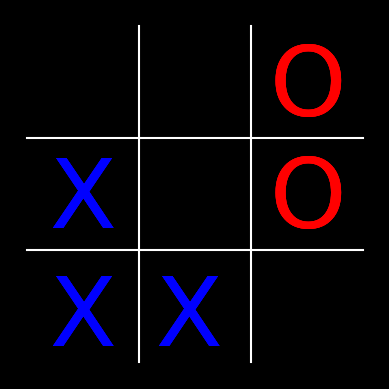

PLAYER IN TURN:  O
ACTIONS FROM TURN 5:
[[0 0]
 [0 1]
 [1 1]
 [2 2]]
MOVE PLAYED: [0 1]
WINNER: False 
IS TERMINAL: False


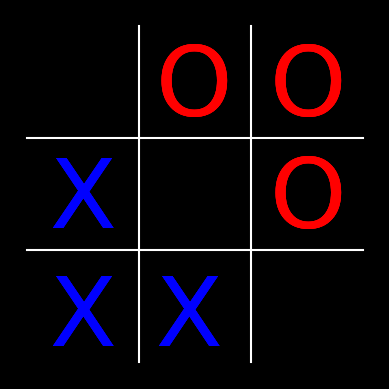

PLAYER IN TURN:  X
ACTIONS FROM TURN 6:
[[0 0]
 [1 1]
 [2 2]]
MOVE PLAYED: [0 0]
WINNER: X 
IS TERMINAL: True


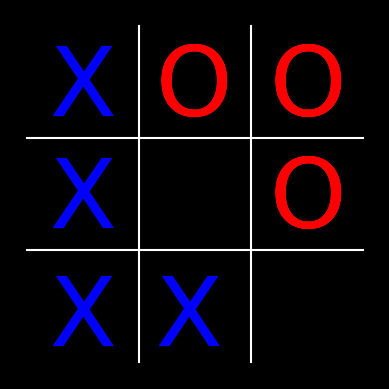

In [6]:
random_game()